## 1. Conceptual Overview

We consider the 1D TDSE:

$$
i\,\hbar \frac{\partial \psi}{\partial t}
=
-\frac{\hbar^2}{2\,m}\,\frac{\partial^2 \psi}{\partial x^2}
\;+\;
V(x)\,\psi(x,t).
$$

Split the Hamiltonian into kinetic ($\hat{T}$) and potential ($\hat{V}$) parts:

$$
\hat{H} = \hat{T} + \hat{V}.
$$

For a small time step $\Delta t$, the **Strang splitting** approximates the evolution operator as:

$$
e^{-\frac{i}{\hbar} \hat{H}\,\Delta t}
\approx
e^{-\frac{i}{\hbar}\,\hat{T}\,\tfrac{\Delta t}{2}}
\;
e^{-\frac{i}{\hbar}\,\hat{V}\,\Delta t}
\;
e^{-\frac{i}{\hbar}\,\hat{T}\,\tfrac{\Delta t}{2}}.
$$

1. **Kinetic step** (momentum space): FFT $\psi(x)$ to $\psi(k)$, multiply by $e^{-i\,E_{\text{kin}}(k)\,\Delta t/(2\hbar)}$, inverse FFT.
2. **Potential step** (real space): multiply $\psi(x)$ by $e^{-i\,V(x)\,\Delta t/\hbar}$.
3. **Kinetic step** again.

This is **second-order** accurate in $\Delta t$, preserves wavefunction norm (unitary), and is fast when using FFTs.


# Theoretical Background of the Split-Operator Method

**1. The Goal: Solving the TDSE**

The fundamental equation we want to solve is the Time-Dependent Schrödinger Equation (TDSE):

$i\hbar \frac{\partial}{\partial t} |\psi(t)\rangle = \hat{H} |\psi(t)\rangle$

where $|\psi(t)\rangle$ is the quantum state vector (wavefunction) at time $t$, $\hat{H}$ is the Hamiltonian operator of the system, and $\hbar$ is the reduced Planck constant.

**2. The Formal Solution: The Time Evolution Operator**

If the Hamiltonian $\hat{H}$ does not explicitly depend on time, the state at a slightly later time $t + \Delta t$ can be formally obtained from the state at time $t$ using the time evolution operator $\hat{U}(\Delta t)$:

$|\psi(t + \Delta t)\rangle = \hat{U}(\Delta t) |\psi(t)\rangle$

This operator is defined as the exponential of the Hamiltonian:

$$ \hat{U}(\Delta t) = \exp\left(-\frac{i\hat{H}\Delta t}{\hbar}\right) $$

**3. The Challenge: Non-Commuting Hamiltonian Components**

In many physical systems, the Hamiltonian $\hat{H}$ is composed of different parts that do not commute with each other. The most common example is the separation into kinetic energy $\hat{T}$ and potential energy $\hat{V}$:

$\hat{H} = \hat{T} + \hat{V}$

Generally, these operators do not commute:

$[\hat{T}, \hat{V}] = \hat{T}\hat{V} - \hat{V}\hat{T} \neq 0$

(They only commute if V is constant or linear in position, which is rarely the case).

This non-commutativity is the central problem. If they *did* commute, we could simply write $\exp\left(-\frac{i(\hat{T}+\hat{V})\Delta t}{\hbar}\right) = \exp\left(-\frac{i\hat{T}\Delta t}{\hbar}\right) \exp\left(-\frac{i\hat{V}\Delta t}{\hbar}\right)$. However, because $[\hat{T}, \hat{V}] \neq 0$, this simple separation is **not** mathematically correct.

**4. The Baker-Campbell-Hausdorff (BCH) Formula**

The relationship between the exponential of a sum of operators and the product of their exponentials is given by the Baker-Campbell-Hausdorff (BCH) formula. For small values, a useful form is:

$$ \exp(A) \exp(B) = \exp\left(A + B + \frac{[A, B]}{2} + \frac{[A, [A, B]]}{12} - \frac{[B, [A, B]]}{24} + \dots\right) $$

If we let $A = -i\hat{T}\Delta t/\hbar$ and $B = -i\hat{V}\Delta t/\hbar$, the simple product $\exp(A)\exp(B)$ differs from the desired $\exp(A+B)$ by terms involving the commutator $[A, B] = (-i\Delta t/\hbar)^2[\hat{T}, \hat{V}]$, and higher-order nested commutators.

**5. The Split-Operator Approximation: Core Idea**

Since calculating $\exp\left(-\frac{i(\hat{T}+\hat{V})\Delta t}{\hbar}\right)$ directly is often intractable, the split-operator method approximates it by applying the evolution due to $\hat{T}$ and $\hat{V}$ *sequentially* over a small time step $\Delta t$. The way this sequence is constructed determines the accuracy of the approximation.

**6. First-Order Splitting (Asymmetric)**

The simplest approximation is:

$$ \hat{U}(\Delta t) \approx \hat{U}_1(\Delta t) = \exp\left(-\frac{i\hat{T}\Delta t}{\hbar}\right) \exp\left(-\frac{i\hat{V}\Delta t}{\hbar}\right) $$

Let's analyze the error. Using the BCH formula (or Taylor expansions):
$$ \exp\left(-\frac{i\hat{T}\Delta t}{\hbar}\right) \exp\left(-\frac{i\hat{V}\Delta t}{\hbar}\right) \approx \exp\left( \left(-\frac{i\hat{T}\Delta t}{\hbar}\right) + \left(-\frac{i\hat{V}\Delta t}{\hbar}\right) + \frac{1}{2} \left[-\frac{i\hat{T}\Delta t}{\hbar}, -\frac{i\hat{V}\Delta t}{\hbar}\right] + \dots \right) $$
$$ \hat{U}_1(\Delta t) \approx \exp\left( -\frac{i(\hat{T}+\hat{V})\Delta t}{\hbar} - \frac{[\hat{T}, \hat{V}](\Delta t/\hbar)^2}{2} + O(\Delta t^3) \right) $$

Comparing this to the exact $\hat{U}(\Delta t) = \exp\left(-\frac{i(\hat{T}+\hat{V})\Delta t}{\hbar}\right)$, the difference (the error) in the exponent is dominated by the commutator term $- \frac{[\hat{T}, \hat{V}](\Delta t/\hbar)^2}{2}$. This means the error *per step* is of the order $O(\Delta t^2)$.

To evolve the system over a finite time $T$, we need $N = T/\Delta t$ steps. The total accumulated error (global error) is roughly $N \times O(\Delta t^2) = (T/\Delta t) \times O(\Delta t^2) = O(\Delta t)$. This is called a **first-order method** because the global error scales linearly with $\Delta t$.

**7. Second-Order Splitting (Symmetric - Strang Splitting)**

A significant improvement comes from using a symmetric sequence, like:

$$ \hat{U}(\Delta t) \approx \hat{U}_2(\Delta t) = \exp\left(-\frac{i\hat{T}\Delta t}{2\hbar}\right) \exp\left(-\frac{i\hat{V}\Delta t}{\hbar}\right) \exp\left(-\frac{i\hat{T}\Delta t}{2\hbar}\right) $$

This is derived from the symmetric Trotter-Suzuki decomposition:
$$ \exp((A+B)\Delta t) = \exp(A\Delta t/2) \exp(B\Delta t) \exp(A\Delta t/2) + O(\Delta t^3) $$

Why is this better? The symmetry causes the leading error term (proportional to $\Delta t^2$) to cancel out. Let $X = -i\hat{T}\Delta t/(2\hbar)$ and $Y = -i\hat{V}\Delta t/\hbar$. We are approximating $\exp(2X+Y)$ with $\exp(X)\exp(Y)\exp(X)$.
Using BCH carefully:
* $\exp(Y)\exp(X) \approx \exp(Y + X + [Y, X]/2 + \dots)$
* $\exp(X)\exp(Y)\exp(X) \approx \exp(X) \exp(Y + X + [Y, X]/2 + \dots)$
* $\approx \exp\left( X + (Y + X + [Y, X]/2) + \frac{[X, (Y + X + [Y,X]/2)]}{2} + \dots \right)$
* $\approx \exp( 2X + Y + [Y, X]/2 + [X, Y]/2 + [X, X]/2 + \text{Higher Order Terms} )$
* $\approx \exp( 2X + Y + O(\Delta t^3) )$

Because $[Y, X] = -[X, Y]$, the terms proportional to $\Delta t^2$ (which involve the first commutator $[\hat{T}, \hat{V}]$) cancel out. The remaining error terms involve higher-order commutators (like $[\hat{T}, [\hat{T}, \hat{V}]]$ and $[\hat{V}, [\hat{V}, \hat{T}]]$) and are proportional to $\Delta t^3$.

The error *per step* for the symmetric method is $O(\Delta t^3)$. The global error over time $T$ is $N \times O(\Delta t^3) = (T/\Delta t) \times O(\Delta t^3) = O(\Delta t^2)$. This is a **second-order method**, which is significantly more accurate for a given step size $\Delta t$ compared to the first-order method.

**8. Unitarity Preservation**

A crucial property of quantum mechanics is that the total probability must be conserved, meaning the norm of the wavefunction ($\langle\psi|\psi\rangle = \int |\psi|^2 d^3r$) must remain constant (usually 1). This requires the time evolution operator $\hat{U}(\Delta t)$ to be **unitary** ($\hat{U}^\dagger\hat{U} = \hat{U}\hat{U}^\dagger = \hat{I}$, where $\dagger$ denotes the Hermitian conjugate and $\hat{I}$ is the identity operator).

An operator $\exp(iA)$ is unitary if $A$ is a Hermitian operator. Since the Hamiltonian $\hat{H}$ (and typically its components $\hat{T}$ and $\hat{V}$) are Hermitian, the exact evolution operator $\exp\left(-\frac{i\hat{H}\Delta t}{\hbar}\right)$ is unitary.

Importantly, the building blocks of the split-operator method, like $\exp\left(-\frac{i\hat{T}\Delta t}{\hbar}\right)$ and $\exp\left(-\frac{i\hat{V}\Delta t}{\hbar}\right)$, are *also* unitary operators. The split-operator approximations ($\hat{U}_1$ and $\hat{U}_2$) are constructed as *products* of these unitary operators. Since the product of unitary operators is always unitary, **the split-operator method produces an approximate evolution operator that is exactly unitary by construction.**

This guarantees that the norm of the wavefunction is conserved at every step of the simulation, preventing probabilities from artificially increasing or decreasing. This inherent stability and physical correctness is a major advantage of the method.

**Summary:**

The split-operator method works by approximating the computationally difficult exponential of the full Hamiltonian $\exp\left(-\frac{i\hat{H}\Delta t}{\hbar}\right)$ with a sequence of exponentials of its simpler (often non-commuting) parts, like $\hat{T}$ and $\hat{V}$. The accuracy of the approximation depends on the order of the sequence: asymmetric splitting gives first-order accuracy ($O(\Delta t)$ global error), while symmetric splitting (Strang splitting) cancels the leading error term and achieves second-order accuracy ($O(\Delta t^2)$ global error). A key theoretical advantage is that the method constructs an exactly unitary approximation, ensuring probability conservation throughout the simulation.


# A Very Short Introduction to the FFT and Inverse FFT

The **Fast Fourier Transform (FFT)** is a **fast** algorithm (typically $(O(N \log N)$) to compute the **Discrete Fourier Transform (DFT)** of a finite set of data points. 

---

## 1. Discrete Fourier Transform

If we have a **1D array** $ x_0, x_1, \dots, x_{N-1} $ (often representing samples of a function in **real space**), then the **DFT** is a new array $ X_k $ given by:

$$
X_k 
\;=\;
\sum_{n=0}^{N-1} x_n \, e^{-2\pi i \frac{kn}{N}},
\quad
k = 0, 1, \dots, N-1.
$$

This transforms the data to **frequency space** (or **momentum space**, in physics), where $ k $ indexes the frequency/mode.

---

## 2. Fast Fourier Transform (FFT)

- A **naive** DFT algorithm takes $O(N^2)$ operations.
- The **FFT** exploits symmetries in the complex exponentials to reduce this to **O(N $\log$ N)**.
- Widely used implementations: **FFTW** (C library), built-in Python `numpy.fft`, or Julia’s `FFTW.jl`.

In **Julia** (or Python), doing `fft(x)` calculates the forward FFT of the array `x`. This is typically the **forward** transform to frequency space.

---

## 3. Inverse FFT (iFFT)

To **invert** the transform, we use the **Inverse DFT**:

$$
x_n 
\;=\; 
\frac{1}{N} 
\sum_{k=0}^{N-1} X_k \, e^{2\pi i \frac{kn}{N}},
\quad
n = 0, 1, \dots, N-1.
$$

In **Julia** or Python, calling `ifft(X)` (or `ifft(x)` in Python) returns this **inverse FFT**, reconstructing the original data (up to numerical round-off).

---

## 4. Typical Usage

1. **Forward transform**: `X = fft(x)`
2. **Process** in frequency space (e.g., filter or multiply by a factor).
3. **Inverse transform**: `x_new = ifft(X)`

---

## 5. Key Points

- **Complex exponentials**: The FFT returns complex values, even if $x$ is real.
- **Normalization**: Some libraries automatically divide by $N$ in `ifft`; others do not. Check library conventions (Julia’s `FFTW` does not, so you often manually divide by $N$ if needed).
- **Indexing**: Frequencies typically run from low to high, then negative frequencies (for real-valued transforms). The *zero frequency* is at index 0, the *Nyquist frequency* around the middle of the array.

The FFT is fundamental in **signal processing**, **image processing**, **spectral methods** for PDEs, and **quantum mechanics** (split-operator approach). Its efficiency and ease of use have made it a **cornerstone** of numerical computing.


[ Info: Saved animation to /home/rangeet/Dropbox/IISER_Office/Courses/2025/PH3205/Slides/09-TDSE/wavefunction_scattering.gif


Plots.AnimatedGif("/home/rangeet/Dropbox/IISER_Office/Courses/2025/PH3205/Slides/09-TDSE/wavefunction_scattering.gif")
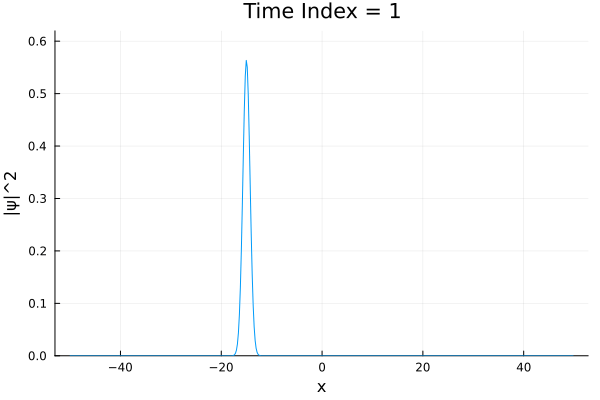

In [4]:
###############################################################################
# 1D TDSE Scattering of a Gaussian Wavepacket from a Finite Square Well
# Using the Split-Operator (Strang splitting) Method in Julia
###############################################################################

using FFTW        # For fft and ifft
using Plots       # For plotting

# --------------------------
# Physical Constants / Setup
# --------------------------
const ħ   = 1.0            # Reduced Planck's constant (choose units)
const m   = 1.0            # Mass of particle (choose units)
const Nx  = 512            # Number of spatial grid points
const x_min = -50.0
const x_max =  50.0
const L   = x_max - x_min  # Total spatial domain length
const dx  = L/(Nx)         # Spatial step size

# Time stepping
const dt       = 0.025      # Time step
const n_steps  = 500       # Number of time steps
const plot_every = 1       # Plot wavefunction every "plot_every" steps

# --------------------------
# Spatial / Momentum Grids
# --------------------------
x = [x_min + i*dx for i in 0:Nx-1]            # Real-space grid
dk = 2π/L                                     # Momentum-space resolution
k_vals = [ (i <= Nx/2) ? (i*dk) : ((i-Nx)*dk) for i in 0:Nx-1 ]
# k_vals now goes from 0..(Nx/2)*dk, then negative values up to -dk

# ------------------------------------
# Define the Finite Square Well
# ------------------------------------
# Let's place a square well from x=-2 to x=2 with depth = -V0
V0 = 50.0          # Well depth
well_left  = -2.0
well_right =  2.0

function finite_square_well(x_array, well_left, well_right, V0)
    V = zeros(size(x_array))
    for i in eachindex(x_array)
        if well_left <= x_array[i] <= well_right
            V[i] = -V0   # negative => well
        else
            V[i] = 0.0
        end
    end
    return V
end

V = finite_square_well(x, well_left, well_right, V0)

# ------------------------------------
# Initial Gaussian Wave Packet
# ------------------------------------
# Centered at x0, with momentum k0, width sigma
x0    = -15.0
sigma = 1.0
k0    = 3.0  # positive => moving to the right

function initial_gaussian_packet(x_array, x0, sigma, k0)
    psi = similar(x_array, ComplexF64)
    norm_factor = 1.0/(sigma*sqrt(pi))^(0.5)
    for i in eachindex(x_array)
        xval   = x_array[i]
        phase  = im*k0*xval
        gauss  = exp(-0.5*((xval - x0)/sigma)^2)
        psi[i]   = norm_factor * gauss * exp(phase)
    end
    return psi
end

psi = initial_gaussian_packet(x, x0, sigma, k0)

# ------------------------------------
# Split-Operator: One Time Step
# ------------------------------------
function split_operator_step!(psi::Vector{ComplexF64}, V::Vector{Float64}, 
                             dt::Float64, k::Vector{Float64})
    # Step 1: half-step in Kinetic (momentum) space
    psi_k = fft(psi)
    # E_kin(k) = ħ^2 * k^2 / (2m)
    for j in eachindex(psi_k)
        E_kin_j = (ħ^2 * k[j]^2)/(2*m)
        # factor for half-step: exp(-i E_kin_j dt/(2ħ))
        psi_k[j] *= exp(-0.5im * E_kin_j * dt / ħ)
    end
    psi .= ifft(psi_k)

    # Step 2: full-step in Potential (real) space
    # factor = exp(-i V(x_j) dt / ħ)
    for j in eachindex(psi)
        psi[j] *= exp(-1im * V[j] * dt / ħ)
    end

    # Step 3: another half-step in Kinetic
    psi_k = fft(psi)
    for j in eachindex(psi_k)
        E_kin_j = (ħ^2 * k[j]^2)/(2*m)
        psi_k[j] *= exp(-0.5im * E_kin_j * dt / ħ)
    end
    psi .= ifft(psi_k)

    return nothing
end

# ------------------------------------
# Main Time Evolution
# ------------------------------------
animation_data = []  # store wavefunction snapshots

# Store initial wavefunction
push!(animation_data, copy(psi))

for step in 1:n_steps
    split_operator_step!(psi, V, dt, k_vals)
    
    # Optionally re-check norm or re-normalize (usually not necessary with good dt)
    # norm_psi = sum(abs2, psi)*dx
    # psi .*= 1/sqrt(norm_psi)

    # Save frames occasionally
    if step % plot_every == 0
        push!(animation_data, copy(psi))
    end
end

# ------------------------------------
# Plot Results
# ------------------------------------
# We'll just plot the final wavefunction vs x, 
# but we can also show intermediate snapshots

#=
display(plot(
    x, abs.(psi).^2,
    xlabel="x",
    ylabel="|psi|^2",
    title="Final Wavefunction",
    legend=false
))


# If you want to visualize multiple snapshots:
num_frames = length(animation_data)
for (i, snapshot) in enumerate(animation_data)
    frame_x = x
    frame_y = abs.(snapshot).^2
    p = plot(frame_x, frame_y,
        xlabel="x",
        ylabel="|psi|^2",
        title="Time step = $(i*plot_every)",
        legend=false
    )
    display(p)
    # could save to file or build a gif
end
=#

###############################################################################
# End of Example
###############################################################################

# 1) Create an Animation block
anim = @animate for (i, snapshot) in enumerate(animation_data)
    # Compute probability density
    prob_density = abs.(snapshot).^2
    
    # Plot the probability density
    plot(
        x, prob_density,
        xlabel="x", ylabel="|psi|^2",
        title="Time Index = $(i*plot_every)",   # or any time label you prefer
        legend=false,                           # no legend needed
        ylim=(0, maximum(prob_density)*1.1)     # just for consistent Y-range
    )
end

# 2) Save as a GIF
#    fps=10 means 10 frames per second, adjust to your preference
gif(anim, "wavefunction_scattering.gif", fps=20)